<a href="https://colab.research.google.com/github/rishrk007/Data-Sprint-24-Tinder-Millennial-Match/blob/main/Data_Sprint_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier, Huber
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , ExtraTreesClassifier , AdaBoostClassifier
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

In [28]:
train = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/train_set_label.csv")
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/test_set_label.csv')

In [29]:
print(train.shape)

(1896, 7)


In [30]:
train = train.drop_duplicates()
train.reset_index(drop=True,inplace=True)

In [31]:
train.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0


In [32]:
train['ID1'] = 0.0
train['ID2'] = 0.0

j = 0
for i in train['ID']:
  train['ID1'][j],train['ID2'][j] = math.modf(i)
  j = j+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
def segement_desc(x):
  if (str(x).find('Meridian, Idaho') > -1):
    return 1
  else:
    return 0

In [34]:
train['Segment Description'] = train['Segment Description'].apply(lambda x: segement_desc(x))

In [35]:
train = pd.get_dummies(train, columns = ['Segment type','Answer'])

In [36]:
train.head()

,ID,Segment Description,Count,Percentage,It became a relationship,ID1,ID2,Segment type_gender,Segment type_mobile,Segment type_university,Segment type_web,Answer_I don't use Tinder,Answer_No,Answer_Yes
0,292890.8970,1,0.000000,0.000000,0,0.8970,292890.0,0,0,0,1,0,1,0
1,292887.9870,1,0.000000,0.000000,0,0.9870,292887.0,0,0,0,1,0,1,0
2,292894.0656,1,499.173606,0.225255,0,0.0656,292894.0,1,0,0,0,0,1,0
3,292887.1180,1,0.000000,0.000000,0,0.1180,292887.0,0,0,0,1,0,1,0
4,292893.6561,1,455.925963,0.211360,0,0.6561,292893.0,1,0,0,0,0,1,0


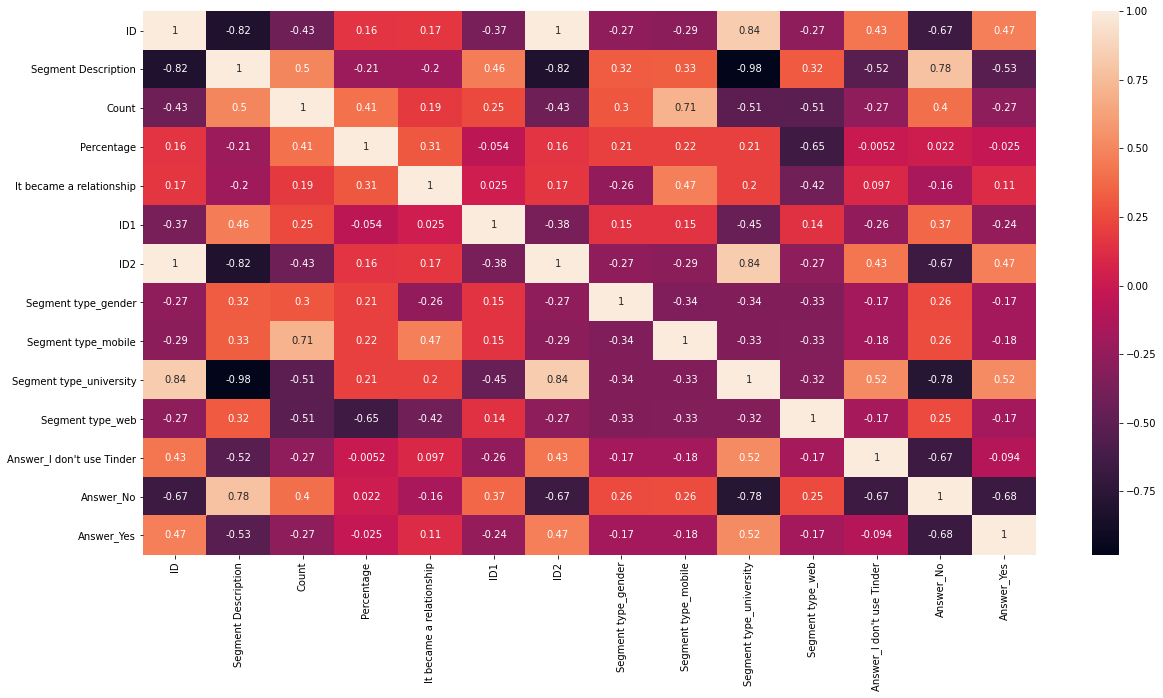

In [37]:
plt.figure(figsize=(20,10))
corr = train.corr()
sns.heatmap(train.corr(),annot=True)

In [38]:
train.columns

Index(['ID', 'Segment Description', 'Count', 'Percentage',
       'It became a relationship', 'ID1', 'ID2', 'Segment type_gender',
       'Segment type_mobile', 'Segment type_university', 'Segment type_web',
       'Answer_I don't use Tinder', 'Answer_No', 'Answer_Yes'],
      dtype='object')

In [39]:
# Drop ID , Segment type_university

col = ['Segment Description', 'Count', 'Percentage','ID1', 'ID2', 'Segment type_gender',
       'Segment type_mobile','Segment type_web',
       'Answer_I don\'t use Tinder', 'Answer_No', 'Answer_Yes']

x = train[col]
y = train['It became a relationship']


In [40]:
x.head()

,Segment Description,Count,Percentage,ID1,ID2,Segment type_gender,Segment type_mobile,Segment type_web,Answer_I don't use Tinder,Answer_No,Answer_Yes
0,1,0.000000,0.000000,0.8970,292890.0,0,0,1,0,1,0
1,1,0.000000,0.000000,0.9870,292887.0,0,0,1,0,1,0
2,1,499.173606,0.225255,0.0656,292894.0,1,0,0,0,1,0
3,1,0.000000,0.000000,0.1180,292887.0,0,0,1,0,1,0
4,1,455.925963,0.211360,0.6561,292893.0,1,0,0,0,1,0


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1325, 11)
y_train dataset:  (1325,)
X_test dataset:  (569, 11)
y_test dataset:  (569,)


**Xgb Classifier**

In [42]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

pred1 = xgb.predict(X_test)
print(accuracy_score(pred1,y_test))

0.9543057996485061


In [43]:
print(confusion_matrix(y_test,pred1))

[[381   7]
 [ 19 162]]


**Random Forest**

In [18]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

pred2 = rfc.predict(X_test)
print(accuracy_score(pred2,y_test))

0.9420035149384886


In [362]:
print(confusion_matrix(y_test,pred2))

[[376  12]
 [ 19 162]]


**LightGBM Classifier**

In [19]:
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)

pred3 = lgb.predict(X_test)
print(accuracy_score(pred3,y_test))

0.9420035149384886


In [364]:
print(confusion_matrix(y_test,pred3))

[[374  14]
 [ 20 161]]


**Catboost Classifier**

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cbc= CatBoostClassifier()
cbc.fit(X_train,y_train)

pred4 = cbc.predict(X_test)
print(accuracy_score(pred4,y_test))

In [377]:
print(confusion_matrix(y_test,pred4))

[[379   9]
 [ 23 158]]


**Testing**

In [44]:
test.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage
0,292974.2311,university,"University of California, Davis",Yes,0.230742,0.115371
1,292889.7996,web,"Meridian, Idaho",No,0.000000,0.000000
2,293724.0350,university,"Westport, CT",Yes,0.000000,0.000000
3,292884.0724,mobile,"Meridian, Idaho",No,1497.699982,0.388752
4,292882.0964,mobile,"Meridian, Idaho",No,1439.464988,0.373646


In [45]:
test['ID1'] = 0.0
test['ID2'] = 0.0

j = 0
for i in test['ID']:
  test['ID1'][j],test['ID2'][j] = math.modf(i)
  j = j+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
del test['ID']
del test['Segment type_university']

In [49]:
test = pd.get_dummies(test, columns = ['Segment type','Answer'])

In [50]:
test['Segment Description'] = test['Segment Description'].apply(lambda x: segement_desc(x))

In [53]:
pred = xgb.predict(test)
target = pd.DataFrame()
target['prediction'] = pred
target.to_csv("xgb.csv", index=False)

**Stacking Classifier**

In [371]:
from sklearn.ensemble import StackingClassifier
estimator=[("rfc",rfc),("xgb",xgb),('lgb',lgb)]
clf = StackingClassifier(estimators=estimator)

clf.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('rfc',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                    

In [372]:
predf = clf.predict(X_test)
print(accuracy_score(predf,y_test))

0.9472759226713533


In [373]:
predf = clf.predict(test)

In [374]:
target = pd.DataFrame()
target['prediction'] = predf
target.to_csv("stack1.csv", index=False)